<a href="https://colab.research.google.com/github/SDPreetham/Yulu_Case_Study/blob/main/Yulu_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yulu Business Case Study**
**- By S D Preetham**


### **Problem Statement:**

* Yulu wishes to understand the factors affecting the demand for  shared electric cycles in the Indian market. The objective here is to analyze the factors influencing electric cycle rentals, specifically whether working days, seasons and weather conditions significantly impact rental counts. The goal is to use statistical methods to uncover patterns and relationships in the data, helping Yulu optimize rental operations and decision-making.

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### **Exploratory Data Analysis :**


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [119]:
rows = df.shape[0]
print('Number of rows:',rows)
columns = df.shape[1]
print('Number of columns:' ,columns)

Number of rows: 10886
Number of columns: 12


In [120]:
# Checking for missing values
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


 **Establishing a relation between the dependent and independent variables**
 * Dependent variable: count
 * Independent: workingday, weather, season etc

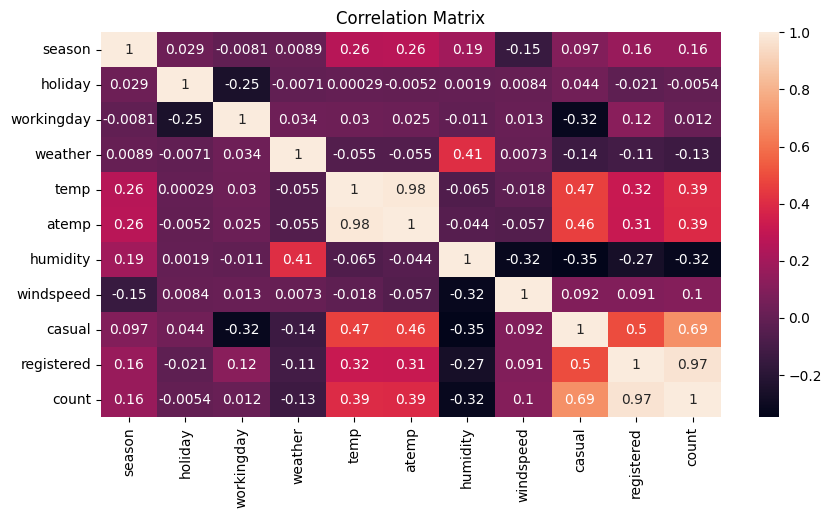

In [121]:
# Convert datetime to pandas datetime format
df['datetime']= pd.to_datetime(df['datetime'])
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix between label and features
corr_matrix = df_numeric.corr()

# Heatmap of correlation matrix
plt.figure(figsize = (10,5))
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.show()

**Insights:**

* It is observed that certain features such as temp-atemp, count-registered, count-casual have strong positive correlation.

* temp and atemp (0.98): Almost perfect correlation, meaning these variables provide similar information and one might be redundant.

* It has also been observed that certain features such as workingday/holiday have minimal impact on the count of the customers.

* Temperature (temp and atemp) positively influences the count, while humidity negatively impacts it.

## **Univariate Analysis:**

**Distribution plots of all the continuous variables:**

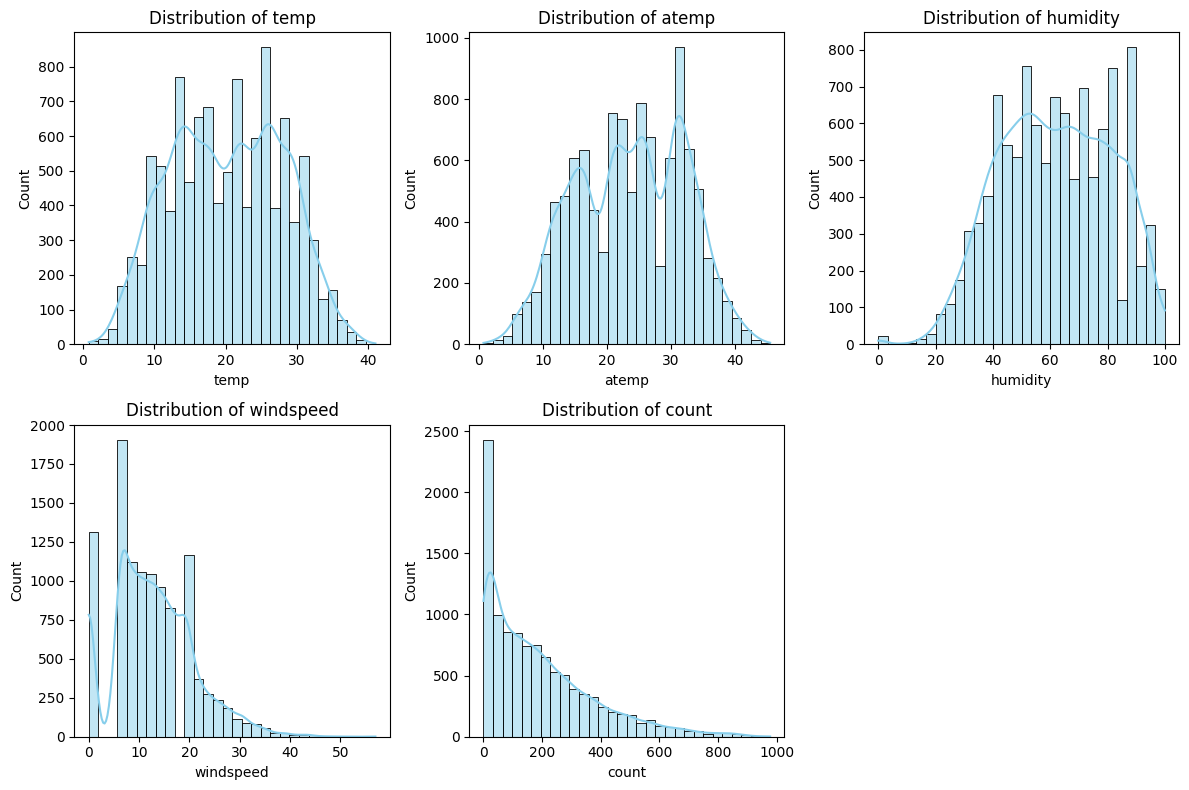

In [122]:
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()


### **Descriptive Statistics:**

In [123]:
for var in continuous_vars:
  print(f"\nStatistics for {var}:")
  print(df[var].describe())
  print(f"Skewness: {df[var].skew()}")
  print(f"Kurtosis: {df[var].kurtosis()}")


Statistics for temp:
count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64
Skewness: 0.003690844422472008
Kurtosis: -0.9145302637630794

Statistics for atemp:
count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64
Skewness: -0.10255951346908665
Kurtosis: -0.8500756471754651

Statistics for humidity:
count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64
Skewness: -0.08633518364548581
Kurtosis: -0.7598175375208864

Statistics for windspeed:
count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%

### **Insights from Descriptive Statistics**
1. **Temperature (temp) and Feels-like Temperature (atemp)**:
* Perceived temperature is slightly higher than actual temperature as Mean temp is 20.23°C while Mean atemp is 23.65°C .

* Skewness: Near zero for temp (0.0037), slightly negative for atemp (-0.1026). It can be inferred that both are approximately symmetric.

* Kurtosis: Negative for both (temp: -0.91, atemp: -0.85) This indicates a flatter distribution with fewer extreme values.


2. **Humidity:**
* Mean: 61.89%, with a wide range (0% to 100%).

* Skewness & Kurtosis: Slightly negative (-0.0863, -0.76) → Symmetric but somewhat flatter distribution.

* This indicates sudden changes in humidity may affect demand, requiring weather-based rental adjustments.

3. **Windspeed:**
* Mean: 12.8 km/h

* Skewness: 0.589, incidates a right-skewed distribution

* Kurtosis: Slightly positive (0.63) indicating the presence of a few extreme values.

* High windspeed days might reduce rentals, so predictive models should account for this.

4. **Rental Count (Target Variable):**
* Mean: 191 rentals/day, with a high standard deviation (181.14).

* Skewness: 1.24 (right-skewed) indicates more low-rental days than high-rental days.

* Kurtosis: 1.30 suggests a few extreme rental days exist.



**Countplots of all the categorical variables:**

<ipython-input-124-34bee991c42c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df,palette="pastel")
<ipython-input-124-34bee991c42c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df,palette="pastel")
<ipython-input-124-34bee991c42c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df,palette="pastel")
<ipython-input-124-34bee991c42c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

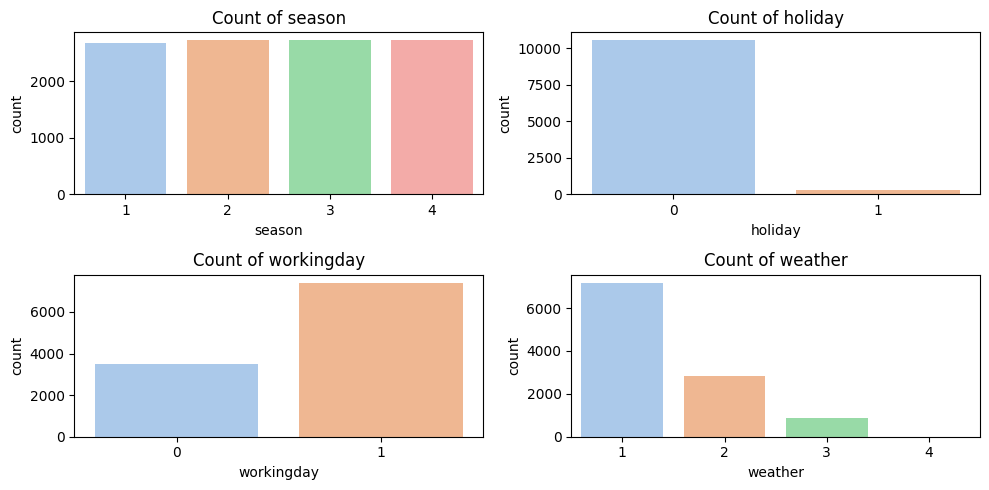

In [124]:
# List of categorical variables (adjust as per dataset)
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

plt.figure(figsize=(10, 5))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, data=df,palette="pastel")
    plt.title(f'Count of {var}')
plt.tight_layout()
plt.show()


## **Statistical Tests & Hypotheses:**

### **Checking assumptions of the test (Normality, Equal Variance):**

In [125]:
from scipy.stats import shapiro, levene

def check_normality(df, feature, target="count"):
    print(f"\n Normality Test for {feature}:")
    categories = df[feature].unique()
    for cat in categories:
        sample = df[df[feature] == cat][target]
        stat, p_value = shapiro(sample)
        print(f"{feature}={cat} → p-value: {p_value} {'(Reject H₀: Not Normal)' if p_value < 0.05 else '(Fail to Reject H₀: Normal)'}")

def check_variance(df, feature, target="count"):
    """Check equal variance across different categories of a feature using Levene's test."""
    print(f"\n Levene’s Test for Equal Variance in {feature}:")
    groups = [df[df[feature] == cat][target] for cat in df[feature].unique()]
    stat, p_value = levene(*groups)
    print(f"Levene’s p-value: {p_value} {'(Reject H₀: Variances are NOT equal)' if p_value < 0.05 else '(Fail to Reject H₀: Variances are equal)'}")

check_normality(df, "workingday")
check_variance(df, "workingday")

check_normality(df, "season")
check_variance(df, "season")

check_normality(df, "weather")
check_variance(df, "weather")



 Normality Test for workingday:
workingday=0 → p-value: 4.4728547627911074e-45 (Reject H₀: Not Normal)
workingday=1 → p-value: 2.2521124830019574e-61 (Reject H₀: Not Normal)

 Levene’s Test for Equal Variance in workingday:
Levene’s p-value: 0.9437823280916695 (Fail to Reject H₀: Variances are equal)

 Normality Test for season:
season=1 → p-value: 8.749584618867662e-49 (Reject H₀: Not Normal)
season=2 → p-value: 6.039374406270491e-39 (Reject H₀: Not Normal)
season=3 → p-value: 1.043680518918597e-36 (Reject H₀: Not Normal)
season=4 → p-value: 1.1299244409282836e-39 (Reject H₀: Not Normal)

 Levene’s Test for Equal Variance in season:
Levene’s p-value: 1.0147116860043298e-118 (Reject H₀: Variances are NOT equal)

 Normality Test for weather:
weather=1 → p-value: 1.5964921477006555e-57 (Reject H₀: Not Normal)
weather=2 → p-value: 9.777839106111785e-43 (Reject H₀: Not Normal)
weather=3 → p-value: 3.875893017396149e-33 (Reject H₀: Not Normal)
weather=4 → p-value: nan (Fail to Reject H₀: N

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-125-3553e867b1be>:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = shapiro(sample)


**Insight:**
* Since all distributions fail the normality test and variances are unequal for season and weather, parametric tests like ANOVA and t-tests are not suitable. Instead, non-parametric tests like Kruskal-Wallis test should be used for analyzing rental differences across seasons and weather conditions and Chi-Square test to assess dependency between weather and season (as both are categorical).

### **1. Analysis: Working Day vs Number of Electric Cycles Rented**

* Test: Independent Samples t-test (as workingday is binary: 0 or 1)
Hypotheses
* H₀ (Null Hypothesis): The average number of cycles rented on working days is equal to the number rented on non-working days.

* H₁ (Alternate Hypothesis): The average number of cycles rented on working days is different from that on non-working days.

In [126]:
workingday_counts = df['workingday'].value_counts()
print('The number of working days are: ', workingday_counts[1])
print('The number of non-working days are: ', workingday_counts[0])

The number of working days are:  7412
The number of non-working days are:  3474


In [127]:
holiday_counts = df['holiday'].value_counts()
print('The number of holidays are: ', holiday_counts[1])
print('The number of non-holidays are: ', holiday_counts[0])

The number of holidays are:  311
The number of non-holidays are:  10575


**Insight:**
* It is evident that holidays do not take weekends into account.

In [128]:
from scipy.stats import mannwhitneyu

workingday_rentals = df[df['workingday']==1]['count']
nonworkingday_rentals = df[df['workingday']==0]['count']

stat, p_value = mannwhitneyu(workingday_rentals, nonworkingday_rentals)
print(f'Mann-Whitney U statistic: {stat:.4f}')
print(f'P-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
  print('H₀ is rejected. The average number of cycles rented on working days is different from that on non-working days.')
else:
  print('H₀ is accepted. The average number of cycles rented on working days is similar to the average number rented on non-working days.')

Mann-Whitney U statistic: 12868495.5000
P-value: 0.9679
H₀ is accepted. The average number of cycles rented on working days is similar to the average number rented on non-working days.


**Insight:**

There is no significant difference in the average number of cycles rented between working and non-working days.

### **Bivariate Analysis: Cycle Rentals on Working vs. Non-Working Days**

<ipython-input-129-4fae87d49021>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday", y="count", data=df, palette={"Non-Working Day": "green", "Working Day": "red"})


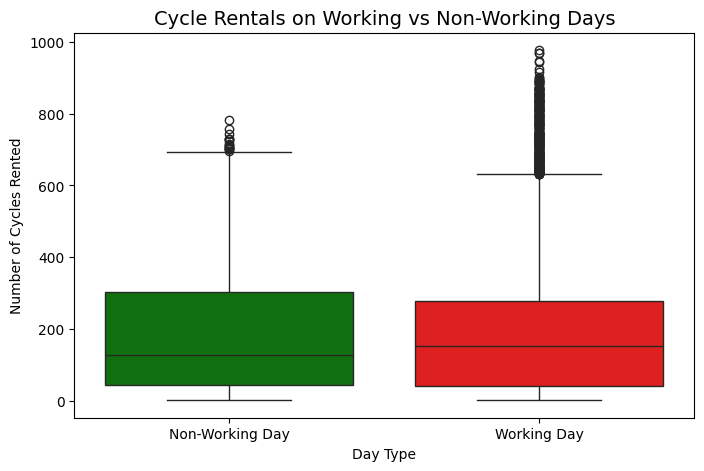

In [129]:
plt.figure(figsize=(8, 5))
df["workingday"] = df["workingday"].map({0: "Non-Working Day", 1: "Working Day"})
sns.boxplot(x="workingday", y="count", data=df, palette={"Non-Working Day": "green", "Working Day": "red"})
plt.title("Cycle Rentals on Working vs Non-Working Days", fontsize=14)
plt.xlabel("Day Type")
plt.ylabel("Number of Cycles Rented")
plt.show()

<ipython-input-130-86344bd14359>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday", y="count", data=df, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/cate

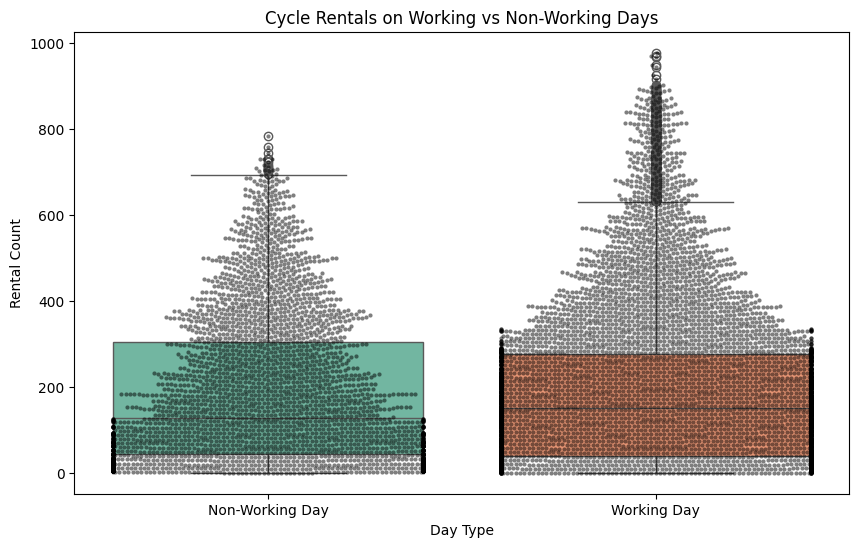

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Boxplot for rental distribution
sns.boxplot(x="workingday", y="count", data=df, palette="Set2")

# Swarmplot overlay for individual points
sns.swarmplot(x="workingday", y="count", data=df, color="black", size=3, alpha=0.5)

# Enhancing visualization
plt.xticks(ticks=[0, 1], labels=["Non-Working Day", "Working Day"])
plt.xlabel("Day Type")
plt.ylabel("Rental Count")
plt.title("Cycle Rentals on Working vs Non-Working Days")

plt.show()


**Swarmplot Insights:**

* The density of points suggests a higher concentration of rentals around the median on both working and non-working days.

* More outliers (extremely high rental counts) are visible on working days, indicating occasional spikes in demand.

**Overall Insights:**

* The density of points suggests a higher concentration of rentals around the median on both days.

* Some working days experience extremely high rental counts, indicating occasional spikes in demand.

## **ANOVA Test:**


1.   To check if the number of cycles rented varies across different seasons.
2.   To check if the number of cycles rented varies with different weather.






### **Analysis: Seasons vs Number of cycles rented**

* H₀ (Null Hypothesis): The mean number of cycles rented is the same across all seasons.

* H₁ (Alternate Hypothesis): The mean number of cycles rented differs across at least one season.

In [131]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

spring_rentals = df[df['season']==1]['count']
summer_rentals = df[df['season']==2]['count']
fall_rentals = df[df['season']==3]['count']
winter_rentals = df[df['season']==4]['count']

h_stat_season, p_value_season = kruskal(spring_rentals, summer_rentals, fall_rentals, winter_rentals)

print(f'H-statistic: {h_stat_season:.4f}')
print(f'P-value: {p_value_season}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in rental counts between seasons.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in rental counts between seasons.')

H-statistic: 699.6669
P-value: 2.479008372608633e-151
Fail to reject the null hypothesis. There is no significant difference in rental counts between seasons.


**Analyzing the effect size of the season variable on bike rentals:**

In [132]:

def eta_squared(h_statistic, n_groups, n_total):
    return (h_statistic - n_groups + 1) / (n_total - n_groups)

n_total = len(df)  # Total number of observations
n_groups = df["season"].nunique()  # Number of unique seasons

# Compute Eta Squared
eta_sq_season = eta_squared(h_stat_season, n_groups, n_total)
print(f"Eta squared for season effect: {eta_sq_season:.4f}")



Eta squared for season effect: 0.0640


**Insights:**
* The Eta Squared (η²) value of 0.0640 suggests that season explains 6.4% of the variance in bike rentals. This indicates a moderate effect, meaning seasonality has a noticeable but not dominant influence on rental counts.
* While seasonal trends impact demand, other factors like weather conditions etc may play a more significant role in rental variations.

**Overall Insights:**

* It has been observed that the demand various across seasons.
* Performing visual analysis to understand the season-wise demand.

### **Bivariate Visual Analysis: Season vs Count**

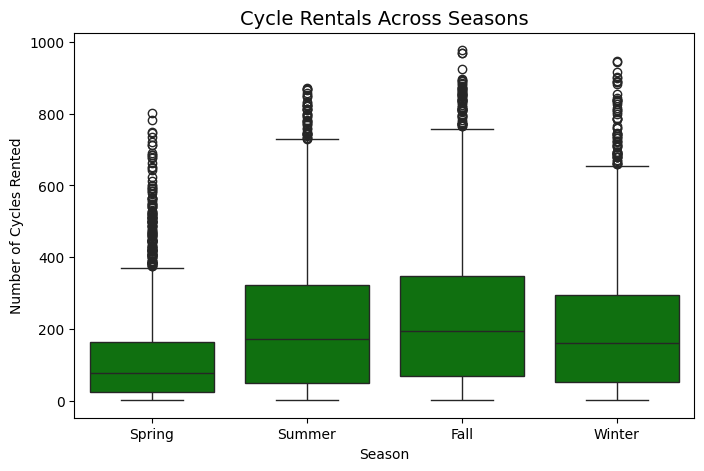

In [133]:
# Create the boxplot
plt.figure(figsize=(8, 5))
df["season"] = df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4:"Winter"})
sns.boxplot(x="season", y="count", data=df, color = 'green')
plt.title("Cycle Rentals Across Seasons", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Number of Cycles Rented")
plt.show()

**Insights:**

* It is observed that the Spring season has the lowest median rentals.
* Summer, Fall and Winter seasons have similar median rentals that are slightly higher than Spring.
* The height of the boxes (IQR) is larger in Summer, Fall and Winter, indicating a higher variation in rentals during these seasons.

### **Analysis: Weather vs Number of cycles rented**

* H₀ (Null Hypothesis): The mean number of cycles rented is the same across kinds of weather.

* H₁ (Alternate Hypothesis): The mean number of cycles rented differs across at least one kind of weather.

In [134]:
normal_rentals = df[df['weather']==1]['count']
cloudy_rentals = df[df['weather']==2]['count']
rainy_rentals = df[df['weather']==3]['count']
storm_rentals = df[df['weather']==4]['count']

h_stat_weather, p_value_weather = kruskal(normal_rentals, cloudy_rentals, rainy_rentals, storm_rentals)

print(f'H-statistic: {h_stat_weather:.4f}')
print(f'P-value: {p_value_weather:}')

alpha = 0.05
if p_value_weather < alpha:

  print('Reject H₀. There is a significant difference in rental counts between weather conditions.')
else:
  print('Fail to reject H₀. There is no significant difference in rental counts between weather conditions.')


H-statistic: 205.0022
P-value: 3.501611300708679e-44
Reject H₀. There is a significant difference in rental counts between weather conditions.


In [135]:
def eta_squared(h_statistic, n_groups, n_total):
    return (h_statistic - n_groups + 1) / (n_total - n_groups)

n_total = len(df)  # Total number of observations
n_groups = df["weather"].nunique()  # Number of unique seasons

# Compute Eta Squared
eta_sq_weather = eta_squared(h_stat_weather, n_groups, n_total)
print(f"Eta squared for weather effect: {eta_sq_weather:.4f}")


Eta squared for weather effect: 0.0186


**Insight:**
* The Eta Squared (η²) value of 0.0186 for the weather effect indicates that only 1.86% of the variance in bike rentals can be attributed to different weather conditions. This suggests that while weather has some influence on rentals, it is a relatively weak factor.

**Overall Insights:**
* It has been observed that the demand varies with different weather.
* Performing visual analysis to understand the variation of demand with weather.

### **Bivariate Visual Analysis: Weather vs Count**

<ipython-input-136-ff2e8aabe251>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'weather', y = 'count', data = df, palette = {'Normal':'green', 'Cloudy':'yellow', 'Rainy':'orange', 'Stormy':'red'})


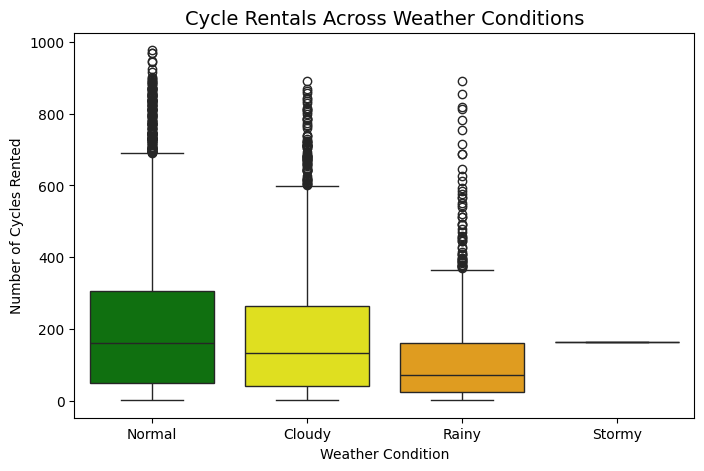

In [136]:
plt.figure(figsize=(8,5))
df["weather"] = df["weather"].map({1:'Normal', 2:'Cloudy', 3:'Rainy', 4:'Stormy'})
sns.boxplot(x = 'weather', y = 'count', data = df, palette = {'Normal':'green', 'Cloudy':'yellow', 'Rainy':'orange', 'Stormy':'red'})
plt.title('Cycle Rentals Across Weather Conditions', fontsize = 14)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Cycles Rented')
plt.show()

**Insights:**
* Rentals are highest during normal & cloudy conditions but drop significantly in rainy conditions.

* The interquartile range (IQR) is larger in normal and cloudy conditions compared to rainy conditions.

### **Analysis: Chi-Square Test of Independence**

* To check whether Weather is dependent on Season, we need to test the association between two categorical variables: Weather and Season.

* The Chi-Square test determines if there is a significant relationship between two categorical variables.



**Hypotheses:**
* H₀ (Null Hypothesis): Weather conditions do not depend on seasons.

* H₁ (Alternative Hypothesis):Weather conditions vary significantly by season.

In [137]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['season'], df['weather'])
contingency_table


weather,Cloudy,Normal,Rainy,Stormy
season,,,,
Fall,604,1930,199,0
Spring,715,1759,211,1
Summer,708,1801,224,0
Winter,807,1702,225,0


In [138]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)
alpha = 0.05
if p < alpha:
    print("Reject the Null Hypothesis. Weather and Season are dependent.")
else:
    print("Fail to Reject the Null Hypothesis. Weather and Season are independent.")


Chi-Square Statistic: 49.15865559689363
P-value: 1.5499250736864862e-07
Degrees of Freedom: 9
Expected Frequencies Table:
 [[7.11493845e+02 1.80559765e+03 2.15657450e+02 2.51056403e-01]
 [6.99258130e+02 1.77454639e+03 2.11948742e+02 2.46738931e-01]
 [7.11493845e+02 1.80559765e+03 2.15657450e+02 2.51056403e-01]
 [7.11754180e+02 1.80625831e+03 2.15736359e+02 2.51148264e-01]]
Reject the Null Hypothesis. Weather and Season are dependent.


**Insights:**
* The heatmap showed a near-zero correlation between weather and season because Pearson correlation measures linear relationships between numerical variables, whereas both weather and season are categorical.
* However, the Chi-Square test revealed a significant dependency because certain weather conditions are more likely in specific seasons, even if the relationship is non-linear. This explains why there is no strong correlation but still a statistical association—weather and season do not change together in a linear way, but their distributions are dependent.
* Hence, for categorical relationships, the Chi-Square test is more reliable than Pearson correlation.


### **Visualization : Weather Conditions across Seasons**

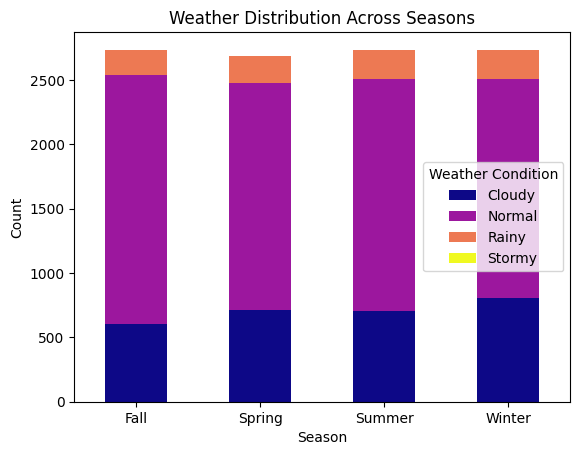

In [139]:
weather_season_ct = pd.crosstab(df['season'], df['weather'])
weather_season_ct.plot(kind='bar', stacked=True,colormap='plasma')
plt.title('Weather Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Weather Condition')
plt.xticks(rotation=0)
plt.show()

**Obtaining the Cramer's V statistic to quantify the strength of association:**

In [140]:
def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * (min_dim - 1)))

n = np.sum(contingency_table.values)
min_dim = min(contingency_table.shape) - 1
v = cramers_v(chi2, n, min_dim)
print(f"Cramer's V: {v:.4f}")


Cramer's V: 0.0475


**Insights:**

* The obtained Cramer's V value of 0.0475 suggests a very weak association between season and weather.

* In practical terms, knowing the season provides very little predictive power in determining the weather category.

### **Final Insights and Recommendations:**

### **Effect of Working Days on Rentals:**

* The statistical test does not indicate significant difference in cycle rentals between working and non-working days.

* This suggests that other factors might have a stronger influence on rentals rather than whether it is a working day.

### **Effect of Season on Rentals:**
*  From the analysis, it is evident that fall and summer seasons record higher rental counts, while spring shows the lowest demand.

**Recommendations:**
* Seasonal Promotions & Incentives: Introduce discounts and marketing campaigns during lower-demand seasons (Spring, Winter) to encourage usage.

### **Effect of Weather on Rentals**
* Rental counts vary significantly across different weather conditions. It is observed that rentals are the highest on normal (clear) days, followed by cloudy days, while rainy and stormy conditions significantly reduce rentals.

**Recommendations:**

* Dynamic Pricing: Implement lower rental rates or special discounts on rainy days to encourage usage.

* Weather-Responsive Fleet Management: Reduce available fleet size on days with expected rainfall while ensuring sufficient bikes on clear days.

By leveraging these insights, the cycle rental system can be optimized for demand fluctuations, improving user experience and operational efficiency.